## Visualizing Filters of a Convolutional Neural Network

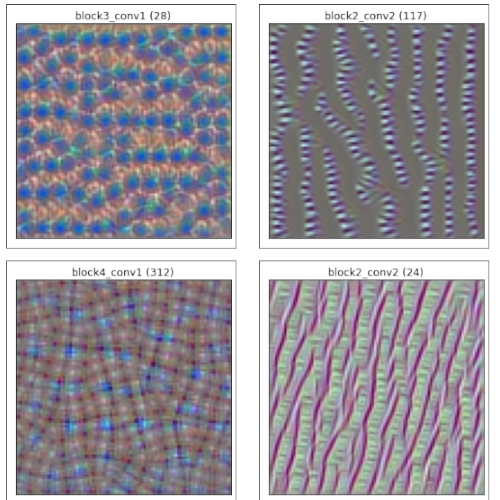

## Task 2: Downloading the Model

In [ ]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import random

In [ ]:
model= tf.keras.applications.vgg16.VGG16(include_top=False,
                                         weights= 'imagenet',
                                         input_shape= (96,96,3))
model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
______________________________________________________________

## Task 3: Get Layer Output

In [ ]:
def get_submodel(layer_name):
  return tf.keras.models.Model(model.input, model.get_layer(layer_name).output)

get_submodel('block1_conv2').summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


## Task 4: Image Visualization

In [ ]:
def create_image():
  return tf.random.uniform((96,96,3), minval=-.05, maxval=0.5)

def plot_image(image, title='random'):
  image= image - tf.math.reduce_min(image)
  image= image / tf.math.reduce_max(image)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title(title)
  plt.show()

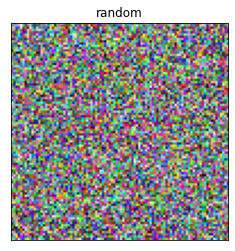

In [ ]:
image= create_image()
plot_image(image)

## Task 5: Training Loop

In [ ]:
def visualize_filter(layer_name, f_index=None, iters=50):
  submodel= get_submodel(layer_name)
  num_filters= submodel.output.shape[-1]

  if f_index is None:
    f_index= random.randint(0,num_filters-1)
  assert num_filters > f_index, 'f_index is out of bounds'
  

  image= create_image()
  verbose_step= int(iters/10)

  for i in range(0, iters):
    with tf.GradientTape() as tape:
      tape.watch(image)
      out= submodel(tf.expand_dims(image, axis= 0))[:,:,:,f_index]
      loss= tf.math.reduce_mean(out)
    grads= tape.gradient(loss, image)
    grads= tf.math.l2_normalize(grads)
    image +=grads *10

    if (i+1)% verbose_step==0:
      print(f'Iteration: {i+1}, loss: {loss.numpy(): 3f}')
  
  plot_image(image, f'{layer_name},{f_index}')


## Task 6: Final Results

In [ ]:
print([layer.name for layer in model.layers if 'conv' in layer.name])

['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


Iteration: 5, loss:  0.000000
Iteration: 10, loss:  0.000000
Iteration: 15, loss:  0.000000
Iteration: 20, loss:  0.000000
Iteration: 25, loss:  0.000000
Iteration: 30, loss:  0.000000
Iteration: 35, loss:  0.000000
Iteration: 40, loss:  0.000000
Iteration: 45, loss:  0.000000
Iteration: 50, loss:  0.000000


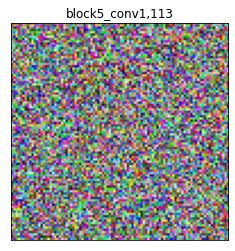

In [ ]:
layer_name ='block5_conv1' #@param ['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']

visualize_filter(layer_name)


In [ ]:
x = tf.convert_to_tensor(2.0)

with tf.GradientTape() as tape:
    tape.watch(x)
    y = x * x - 2
    z = y * x

grads = tape.gradient(z, x)
print(grads)

tf.Tensor(10.0, shape=(), dtype=float32)
